# Rainfall Weather Forecasting 

## Project Description 

`Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. 

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things: 

  

1. Problem Statement:  

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow. 

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there. 

 
 

Dataset Description: 

Number of columns: 23 

 
 

Date  - The date of observation 

Location  -The common name of the location of the weather station 

MinTemp  -The minimum temperature in degrees celsius 

MaxTemp -The maximum temperature in degrees celsius 

Rainfall  -The amount of rainfall recorded for the day in mm 

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am 

Sunshine  -The number of hours of bright sunshine in the day. 

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight 

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight 

WindDir9am -Direction of the wind at 9am 

WindDir3pm -Direction of the wind at 3pm 

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am 

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm 

Humidity9am -Humidity (percent) at 9am 

Humidity3pm -Humidity (percent) at 3pm 

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am 

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm 

Cloud9am - Fraction of sky obscured by cloud at 9am.  

Cloud3pm -Fraction of sky obscured by cloud  

Temp9am-Temperature (degrees C) at 9am 

Temp3pm -Temperature (degrees C) at 3pm 

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df = data.copy()

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.shape

(8425, 23)

In [6]:
# dropping the duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [8]:
# checking for the missing value in the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

<AxesSubplot:>

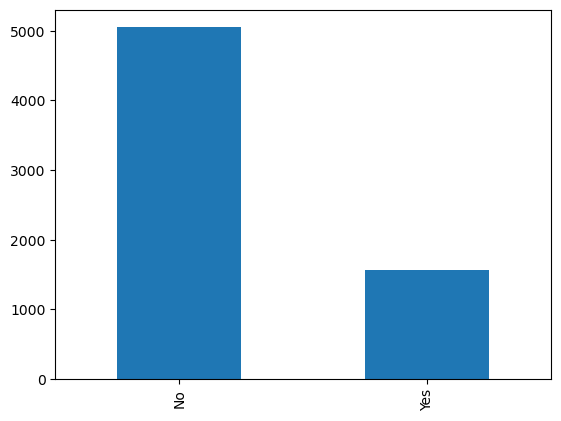

In [9]:
df['RainToday'].value_counts().plot(kind='bar')

<AxesSubplot:>

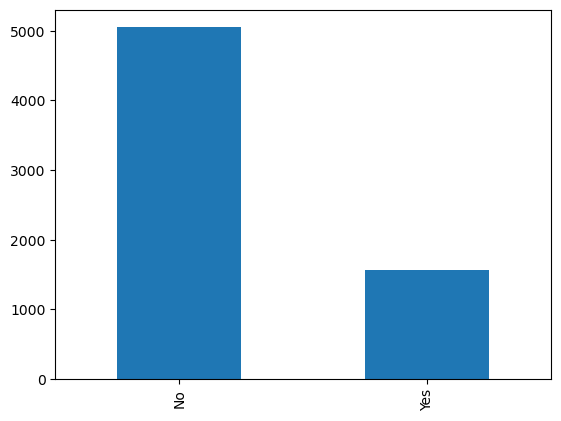

In [10]:
df['RainTomorrow'].value_counts().plot(kind='bar')

### After looking into the both target columns we can say that the classes in the columns are heavily imbalanced

## Values in the target column is imbalanced will handle that in further analysis

In [11]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6692.000000  6705.000000  6624.000000  3841.000000  3526.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.569574     6.156128    10.591418     4.436790     3.785883   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.500000     0.000000     2.600000     5.400000   
50%      13.200000    23.500000     0.000000     4.600000     9.000000   
75%      17.500000    28.400000     0.800000     7.000000    10.800000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    5820.000000   6699.000000   6662.000000  6708.000000  6666.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        14.418577      9.833499      9.620043    17.251733    18.631086   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000      9.000000    56.000000    38.000000   
50%        37.000000     11.000000     17.000000    68.000000    50.000000   
75%        48.000000     19.000000     24.000000    81.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  5454.000000  5451.000000  4896.000000  4860.000000  6711.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.712043     6.646755     2.908324     2.740519     5.744117   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.100000  1010.300000     1.000000     1.000000    13.800000   
50%    1017.600000  1015.100000     5.000000     5.000000    18.000000   
75%    1022.200000  1019.600000     7.000000     7.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6670.000000  
mean     22.708561  
std       6.012896  
min       7.300000  
25%      18.300000  
50%      22.100000  
75%      26.800000  
max      44.100000



- **MinTemp:**
  - Ranges from -2°C to 28.5°C.
  - Average minimum temperature is approximately 13.1°C.
  - Represents the lowest recorded temperature.

- **MaxTemp:**
  - Ranges from 8.2°C to 45.5°C.
  - Average maximum temperature is around 24.1°C.
  - Represents the highest recorded temperature.

- **Rainfall:**
  - Ranges from 0 mm to 371 mm.
  - Average rainfall is about 2.78 mm.
  - Displays variability in precipitation levels.

- **Evaporation:**
  - Ranges from 0 mm to 145 mm.
  - Average evaporation is approximately 5.30 mm.
  - Reflects water evaporation.

- **Sunshine:**
  - Hours of sunshine range from 0 to 13.9 hours.
  - Average sunshine is around 7.89 hours.
  - Indicates daily sunshine duration.

- **WindGustSpeed:**
  - Maximum wind gust speed ranges from 7 km/h to 107 km/h.
  - Average wind gust speed is about 38.98 km/h.
  - Reflects wind gust intensity.

- **WindSpeed9am:**
  - Wind speed at 9 AM ranges from 0 km/h to 63 km/h.
  - Average wind speed at 9 AM is approximately 12.78 km/h.
  - Indicates wind intensity during the morning.

- **WindSpeed3pm:**
  - Wind speed at 3 PM ranges from 0 km/h to 83 km/h.
  - Average wind speed at 3 PM is around 17.57 km/h.
  - Indicates wind intensity during the afternoon.

- **Humidity9am:**
  - Humidity at 9 AM ranges from 10% to 100%.
  - Average humidity at 9 AM is about 67.51%.
  - Reflects morning humidity levels.

- **Humidity3pm:**
  - Humidity at 3 PM ranges from 6% to 99%.
  - Average humidity at 3 PM is around 50.47%.
  - Reflects afternoon humidity levels.

- **Pressure9am:**
  - Atmospheric pressure at 9 AM ranges from 989.8 hPa to 1039 hPa.
  - Average pressure at 9 AM is approximately 1017.63 hPa.
  - Provides morning atmospheric pressure readings.

- **Pressure3pm:**
  - Atmospheric pressure at 3 PM ranges from 982.9 hPa to 1036 hPa.
  - Average pressure at 3 PM is about 1015.12 hPa.
  - Provides afternoon atmospheric pressure readings.

- **Cloud9am and Cloud3pm:**
  - Cloud cover at 9 AM ranges from 0 to 8 (scaled values).
  - Cloud cover at 3 PM also ranges from 0 to 8.
  - Provides information about cloudiness at different times of the day.

- **Temp9am:**
  - Temperature at 9 AM ranges from 1.9°C to 39.4°C.
  - Average temperature at 9 AM is around 17.89°C.
  - Represents morning temperature.

- **Temp3pm:**
  - Temperature at 3 PM ranges from 7.3°C to 44.1°C.
  - Average temperature at 3 PM is approximately 22.71°C.
  - Represents afternoon temperature.

These summaries collectively offer insights into the distribution, range, and variability of various meteorological variables, providing a comprehensive overview of the dataset.

### sprating the dataset into numerica and categorical columns

In [12]:
numeric_columns = [num_col for num_col in df.columns if df[num_col].dtype != "O"]
categorical_columns = [cat_col for cat_col in df.columns if df[cat_col].dtype == "O"]

In [13]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
categorical_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
## ckecking unique value of the categorical column and number of unique values of the numerical columns by using loop
for col in df.columns:
    if df[col].nunique() <= 16:
        
        print(f"{df[col].name} have {df[col].nunique()}unique values. \n{df[col].unique()}")
        print('-'*50)
    else:
    
        print(f'{df[col].name}have {df[col].nunique() } unique values.')
        print('-'*50)

Datehave 3004 unique values.
--------------------------------------------------
Location have 12unique values. 
['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
--------------------------------------------------
MinTemphave 285 unique values.
--------------------------------------------------
MaxTemphave 331 unique values.
--------------------------------------------------
Rainfallhave 250 unique values.
--------------------------------------------------
Evaporationhave 116 unique values.
--------------------------------------------------
Sunshinehave 140 unique values.
--------------------------------------------------
WindGustDir have 16unique values. 
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
--------------------------------------------------
WindGustSpeedhave 52 unique values.
--------------------------------------------------
WindDir9am have

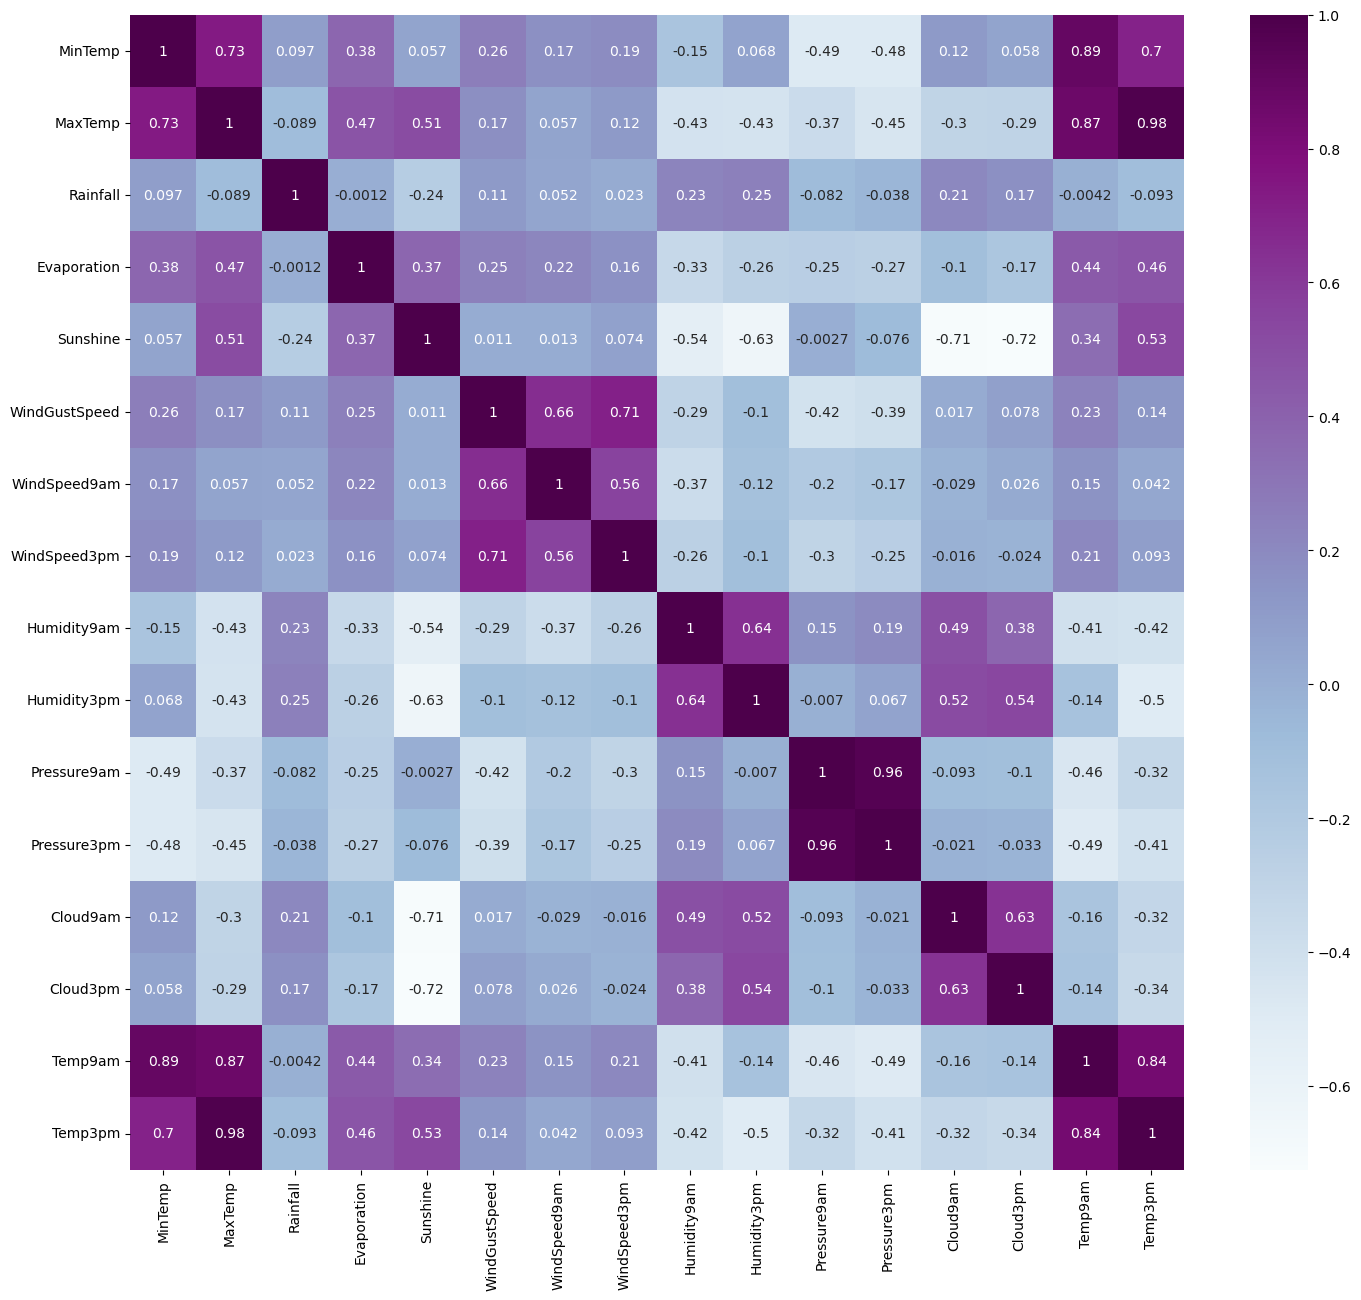

In [16]:
plt.figure(figsize=[17,15])
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.show()

#### At looking into the correlation metrix we can say that some featuers are highly correlated with eachother and this cause the problem of multicollinearity will tackle the issue in the further analysis

### fixing the date column

In [17]:
from datetime import datetime  

# Fixing the date column
df["Date"] = pd.to_datetime(df["Date"])  # Use pd.to_datetime() to convert the column
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop('Date',axis=1, inplace= True)

In [18]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Day  Month  Year  
0     16.9     21.8        No           No    1     12  2008  
1     17.2     24.3        No           No    2     12  2008  
2     21.0     23.2        No           No    3     12  2008  
3     18.1     26.5        No           No    4     12  2008  
4     17.8     29.7        No           No    5     12  2008

# Handling Missing values

In [19]:
# checking the missing value in the dataset in precentage
for i in df.columns:
    print(f'Columns contains {df[i].isnull().sum()/df[i].shape[0]} percent null values')
    print("-"*50)

Columns contains 0.0 percent null values
--------------------------------------------------
Columns contains 0.010351966873706004 percent null values
--------------------------------------------------
Columns contains 0.008429458740017746 percent null values
--------------------------------------------------
Columns contains 0.02040816326530612 percent null values
--------------------------------------------------
Columns contains 0.43197278911564624 percent null values
--------------------------------------------------
Columns contains 0.4785566400473233 percent null values
--------------------------------------------------
Columns contains 0.13930789707187222 percent null values
--------------------------------------------------
Columns contains 0.13930789707187222 percent null values
--------------------------------------------------
Columns contains 0.11742088139603668 percent null values
--------------------------------------------------
Columns contains 0.043478260869565216 perce

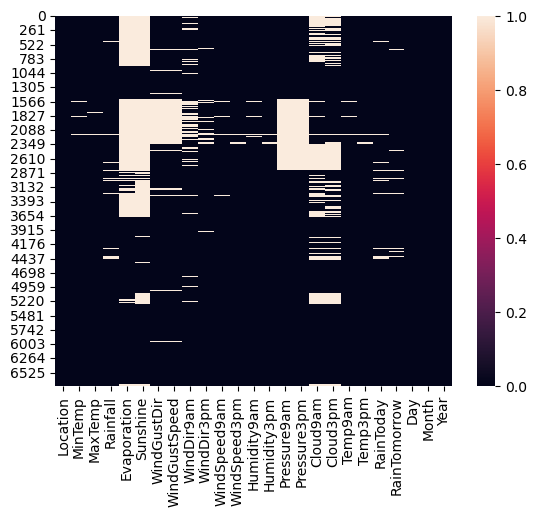

In [20]:
sns.heatmap(df.isnull())
plt.show()

In [21]:
# Evaporation ,Sunshine contain more than 40 % missing value . so it make no sence to take them in the forward analysis
# so we are dropping Evoproration and sunshine
df.drop(['Evaporation','Sunshine'],axis=1,inplace=True)

In [22]:
numeric_column = [num_col for num_col in df.columns if df[num_col].dtype != "O"]
numeric_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

In [23]:
# handling missing values in the numeric column
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_filled = pd.DataFrame(imputer.fit_transform(df[numeric_column]), columns=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year'])


In [24]:
# handling missing values in categorical column
categorical_columns.remove('Date')
df[categorical_columns].isnull().sum(),categorical_columns

(Location          0
 WindGustDir     942
 WindDir9am      794
 WindDir3pm      294
 RainToday       138
 RainTomorrow    138
 dtype: int64,
 ['Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'])

In [25]:
# using simpleimputer to handle missing value with mode of the categorical column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df_imputed = pd.DataFrame(imputer.fit_transform(df[categorical_columns]), columns=[
  'Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'])

In [26]:
df_imputed.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [27]:
df_filled.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

In [28]:
df1 = pd.concat([df_filled, df_imputed], axis=1)

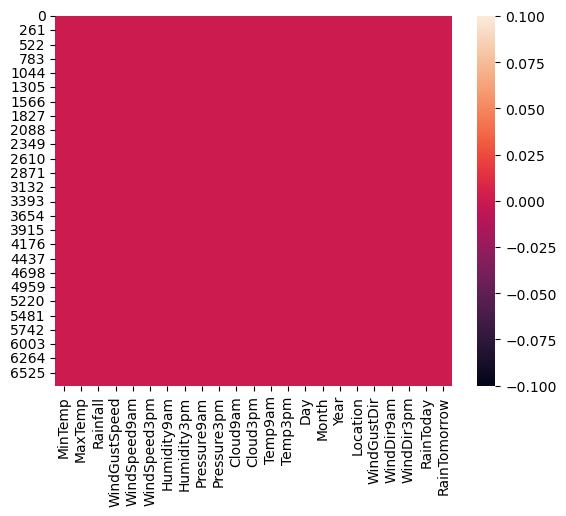

In [29]:
# checking null
sns.heatmap(df1.isnull())
plt.show()

## now the dataframe is cleaned and have no null values.


# Exploratory data analysis

## Univariate analysis

### Numerical columns

In [30]:
numeric_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

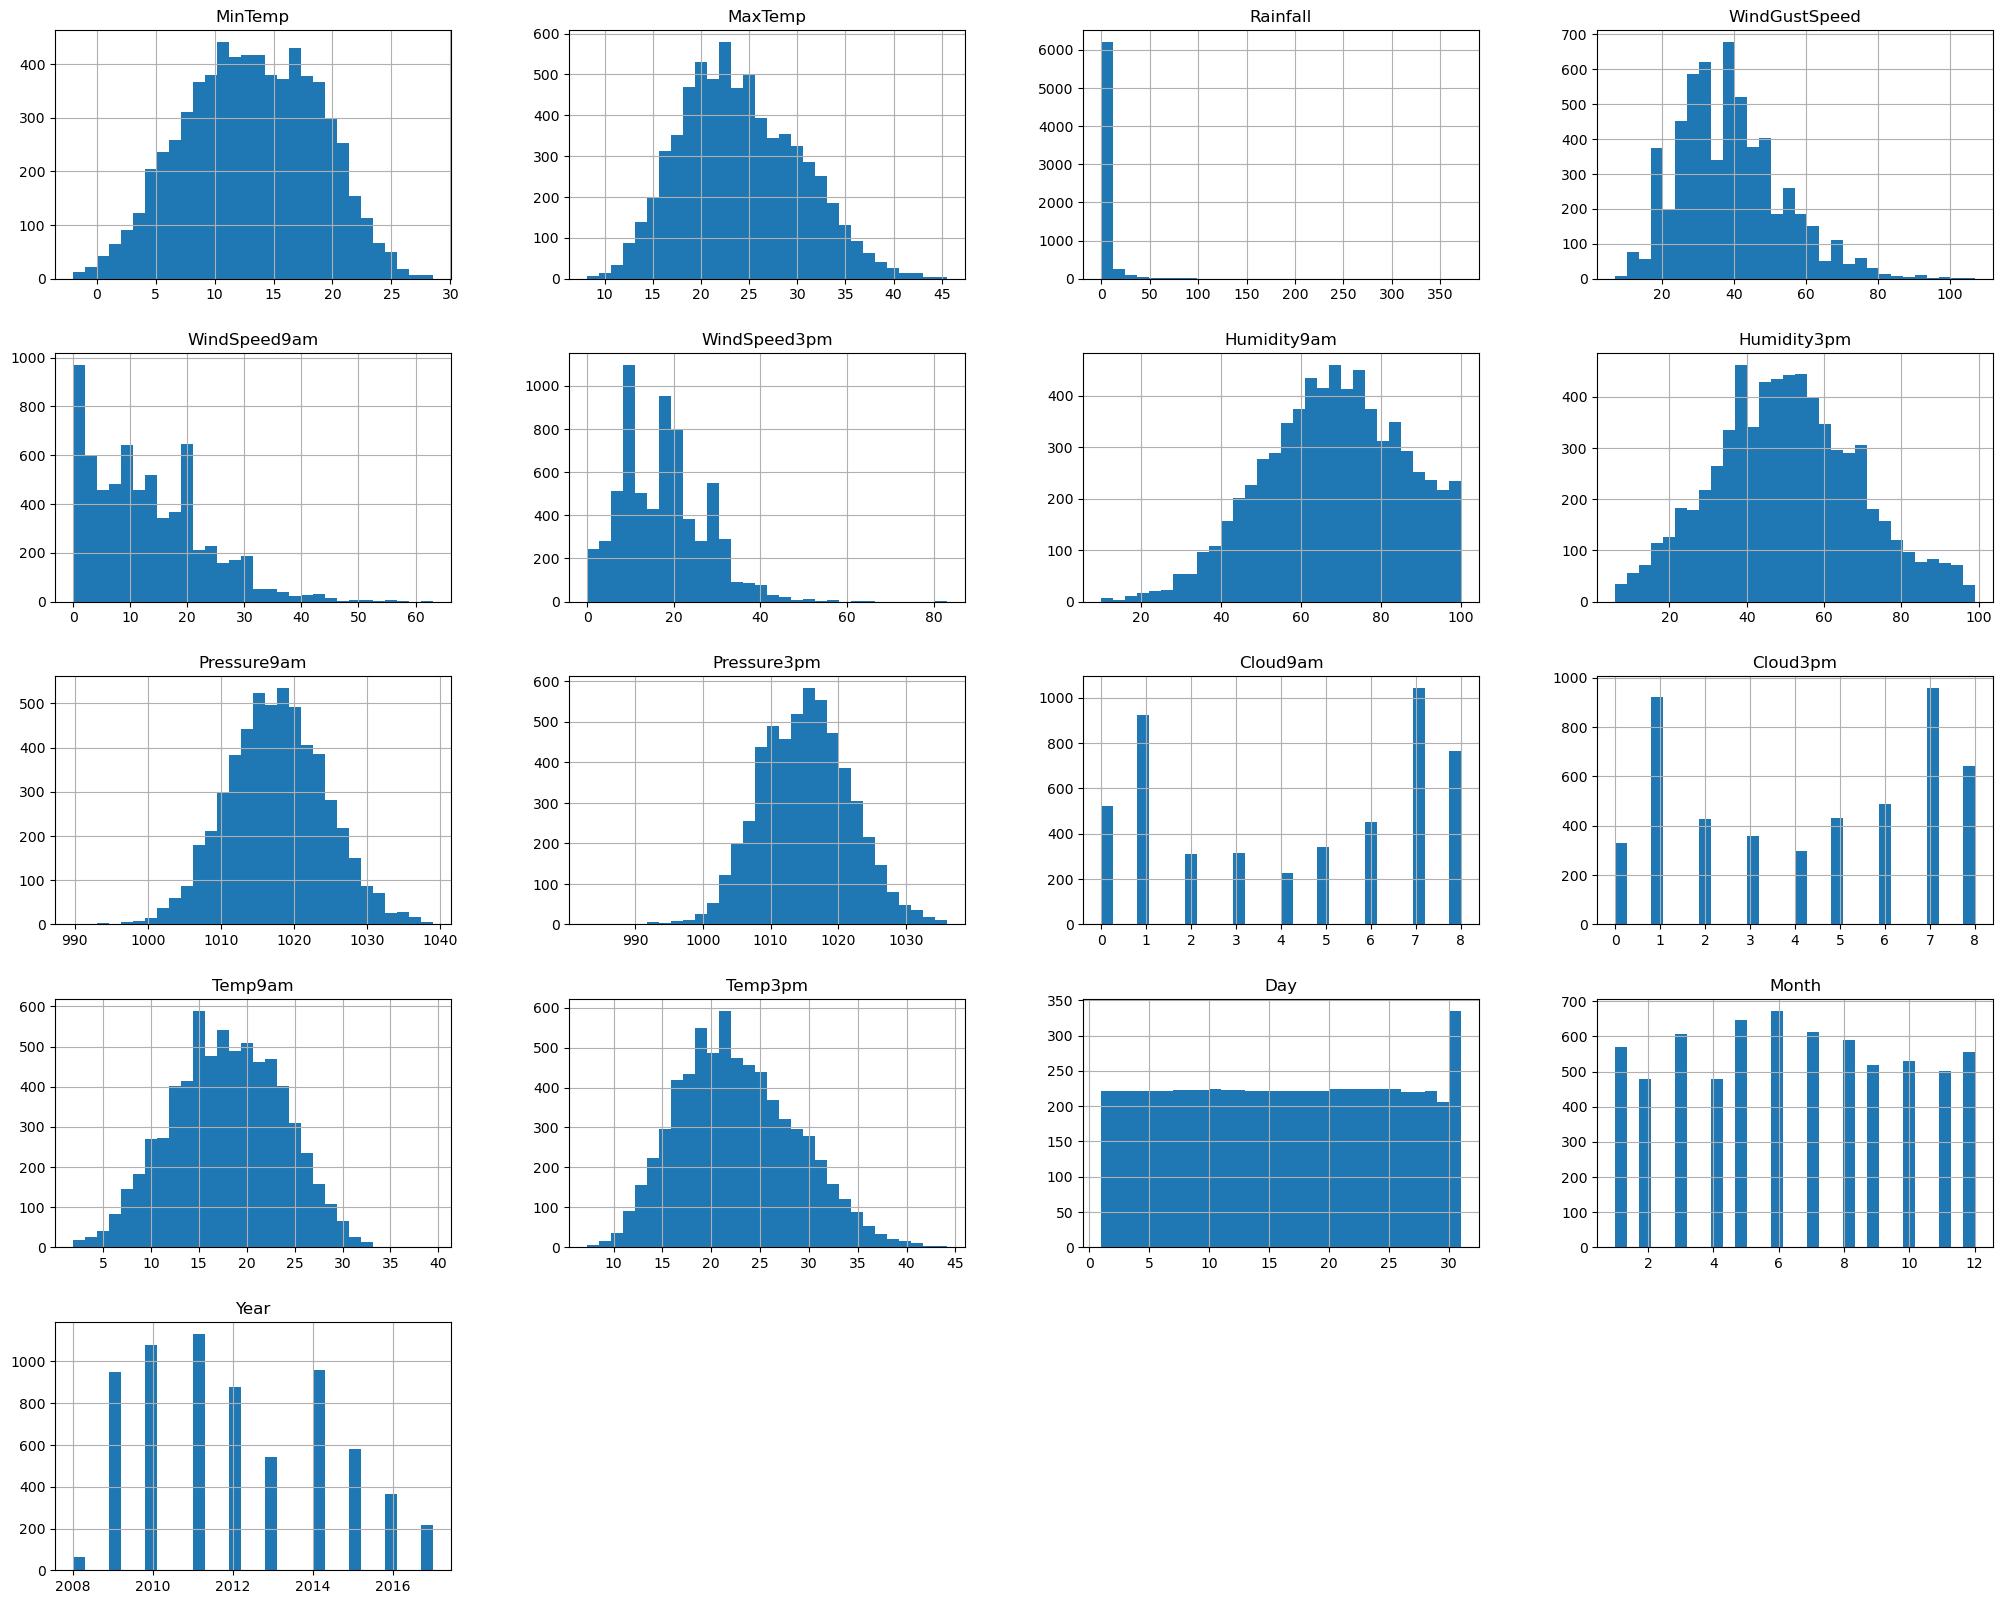

In [31]:
# ploting histplot for the numerical columns: 
df[['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
   'Day',
   'Month',
   'Year']
 ].hist(bins=30, figsize=(25,20))
plt.show()

* after looking into the numerical columns analysis . we can say that the data is normally distrubuted in the most of the columns and some columns have positive skewkess .

### Categorical columns

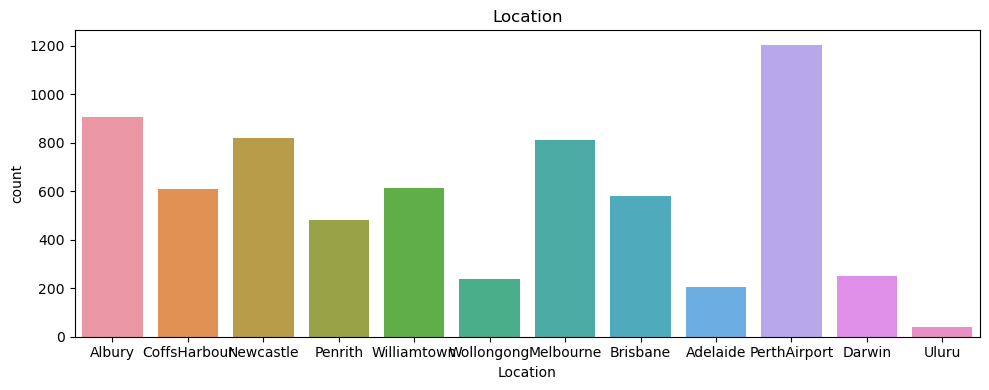

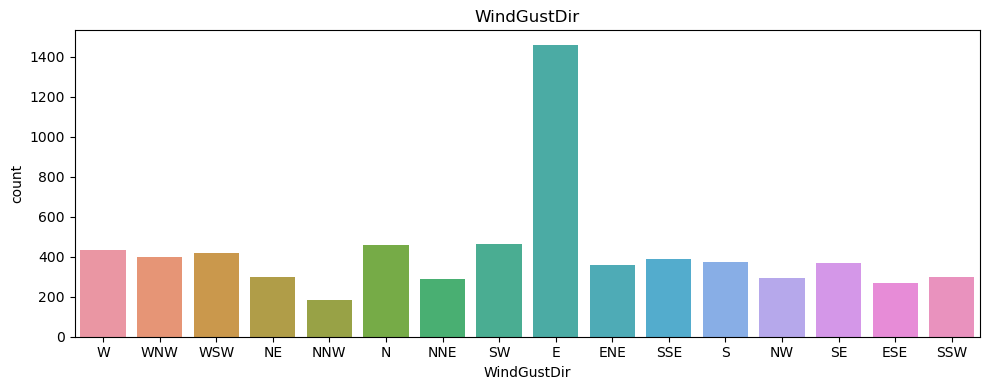

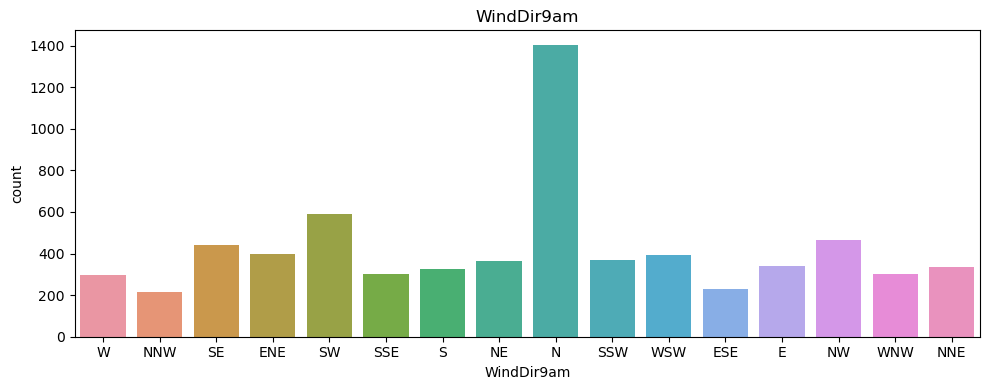

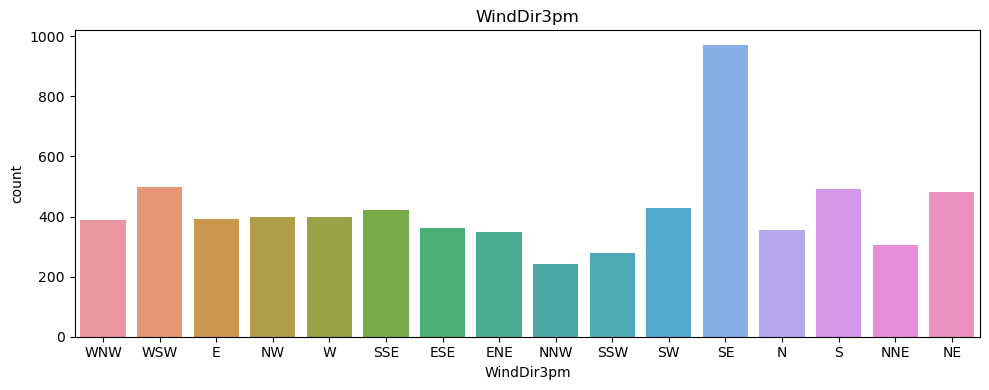

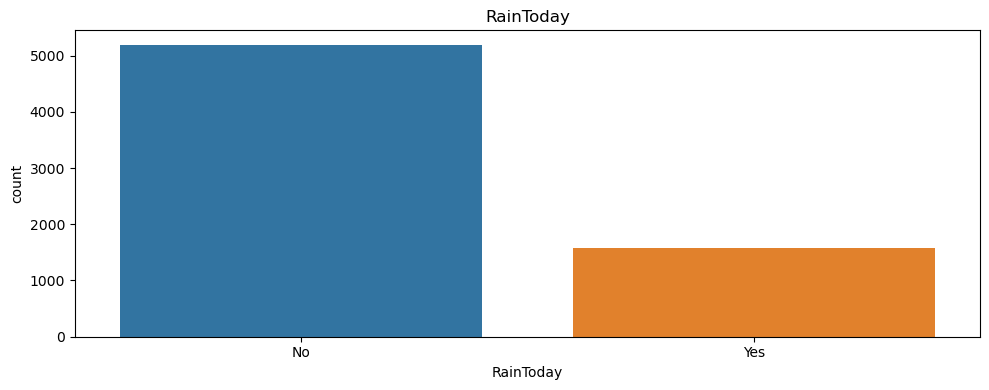

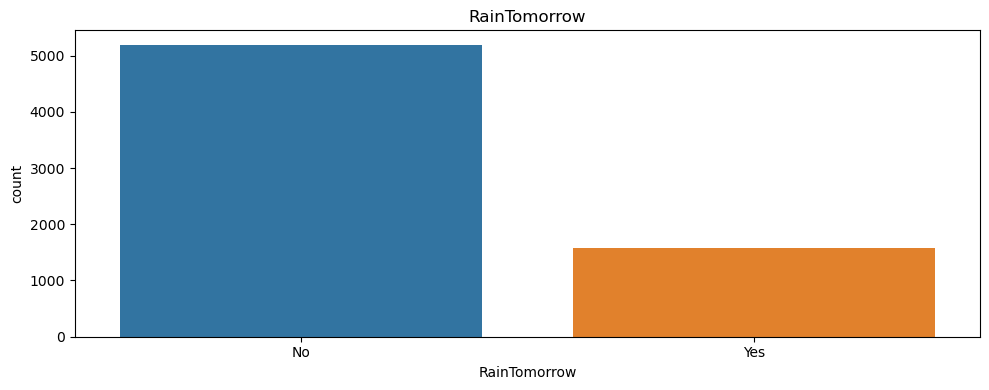

In [32]:
# Countplot of Categorical Columns
for col in categorical_columns:
    if col != 'Date':
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df1, x=col)
        plt.title(col)
        plt.tight_layout()
        plt.show()

## Bivariate analysis

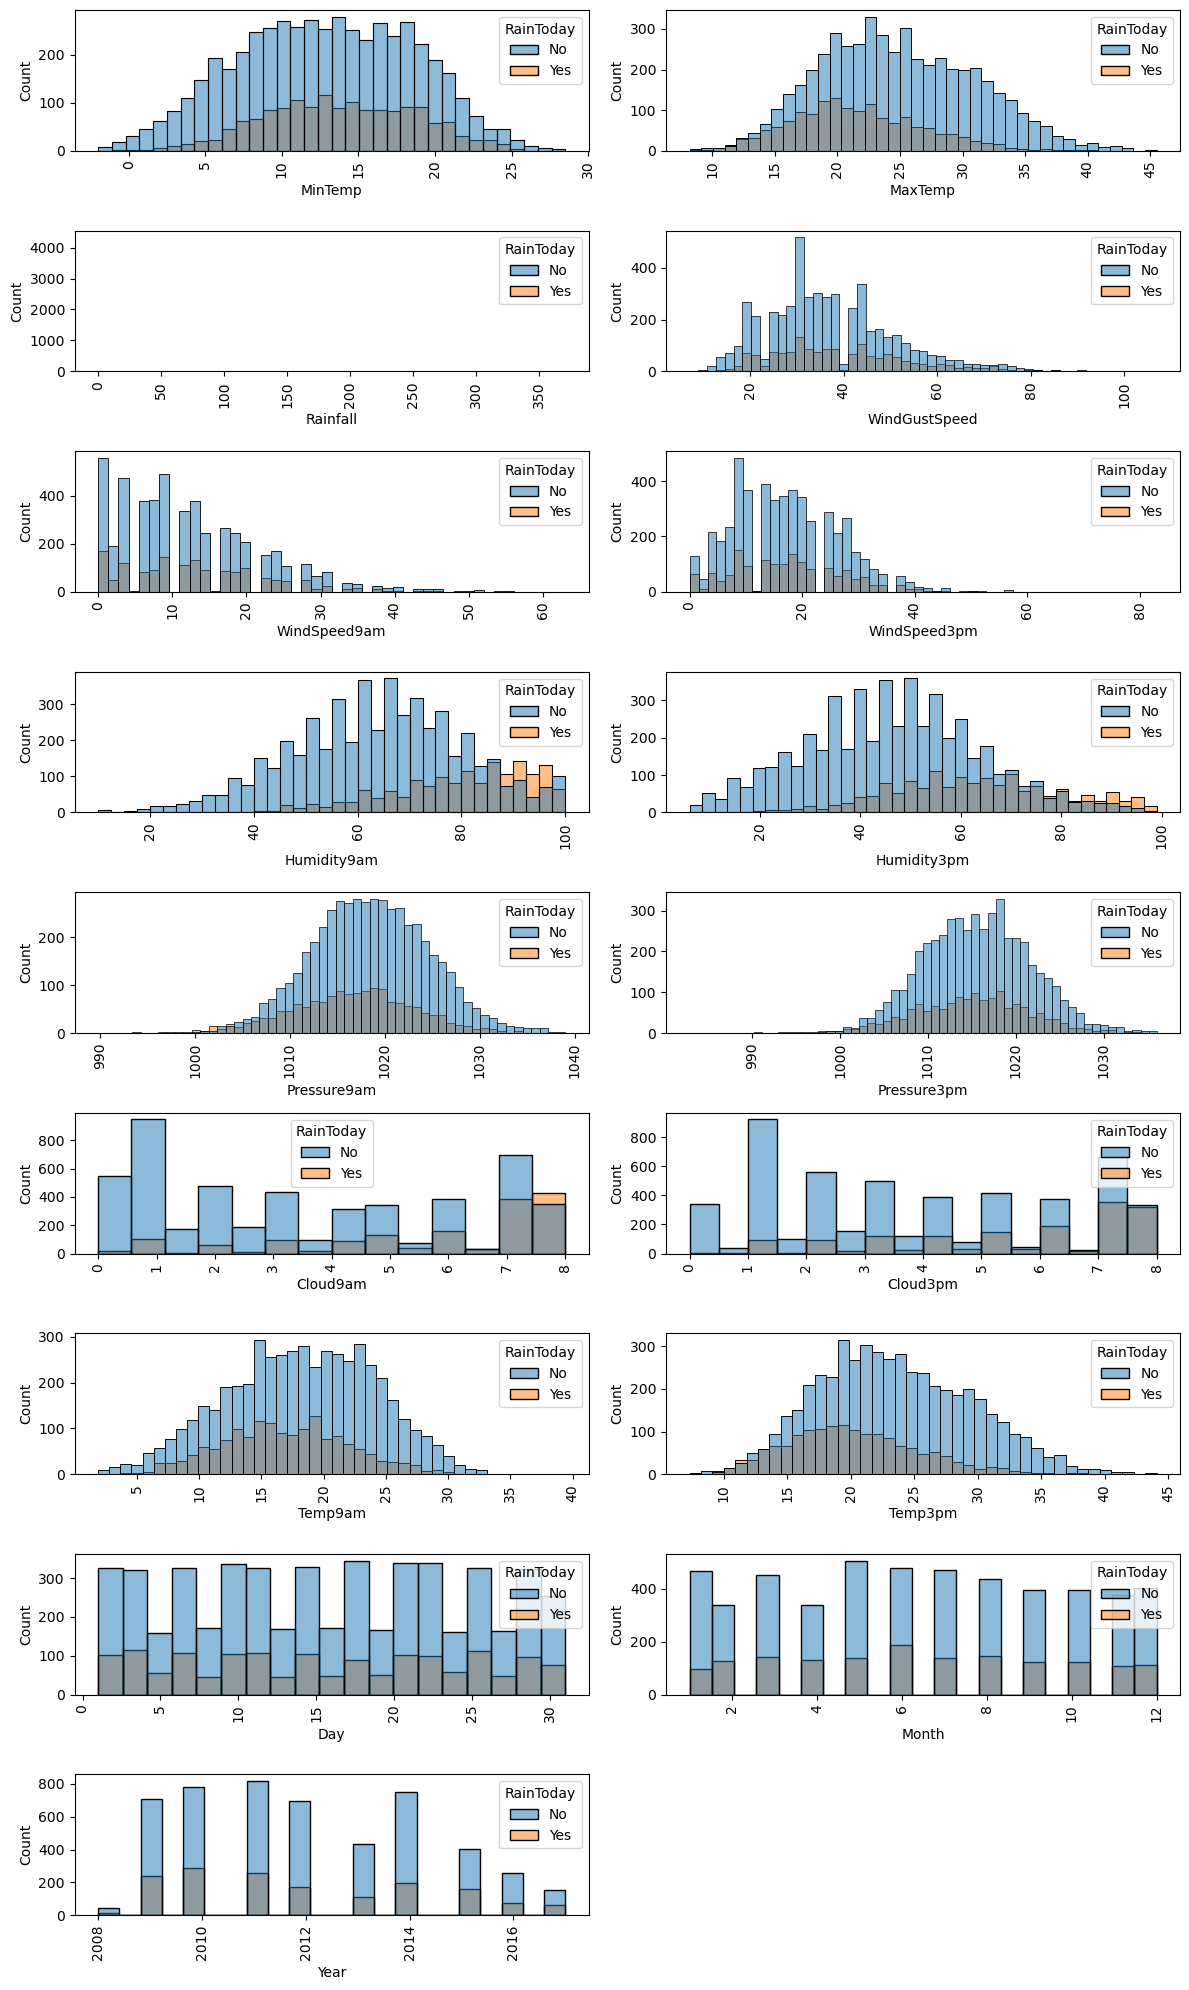

In [33]:
# Create the subplots
fig = plt.figure(figsize=(12, 20))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numeric_column):
    plt.subplot(9,2 , i + 1)
    sns.histplot(data=df1, x=col,hue=df['RainToday'])
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


#### with every feature the chances of the rain related with that feature below the count of the 100

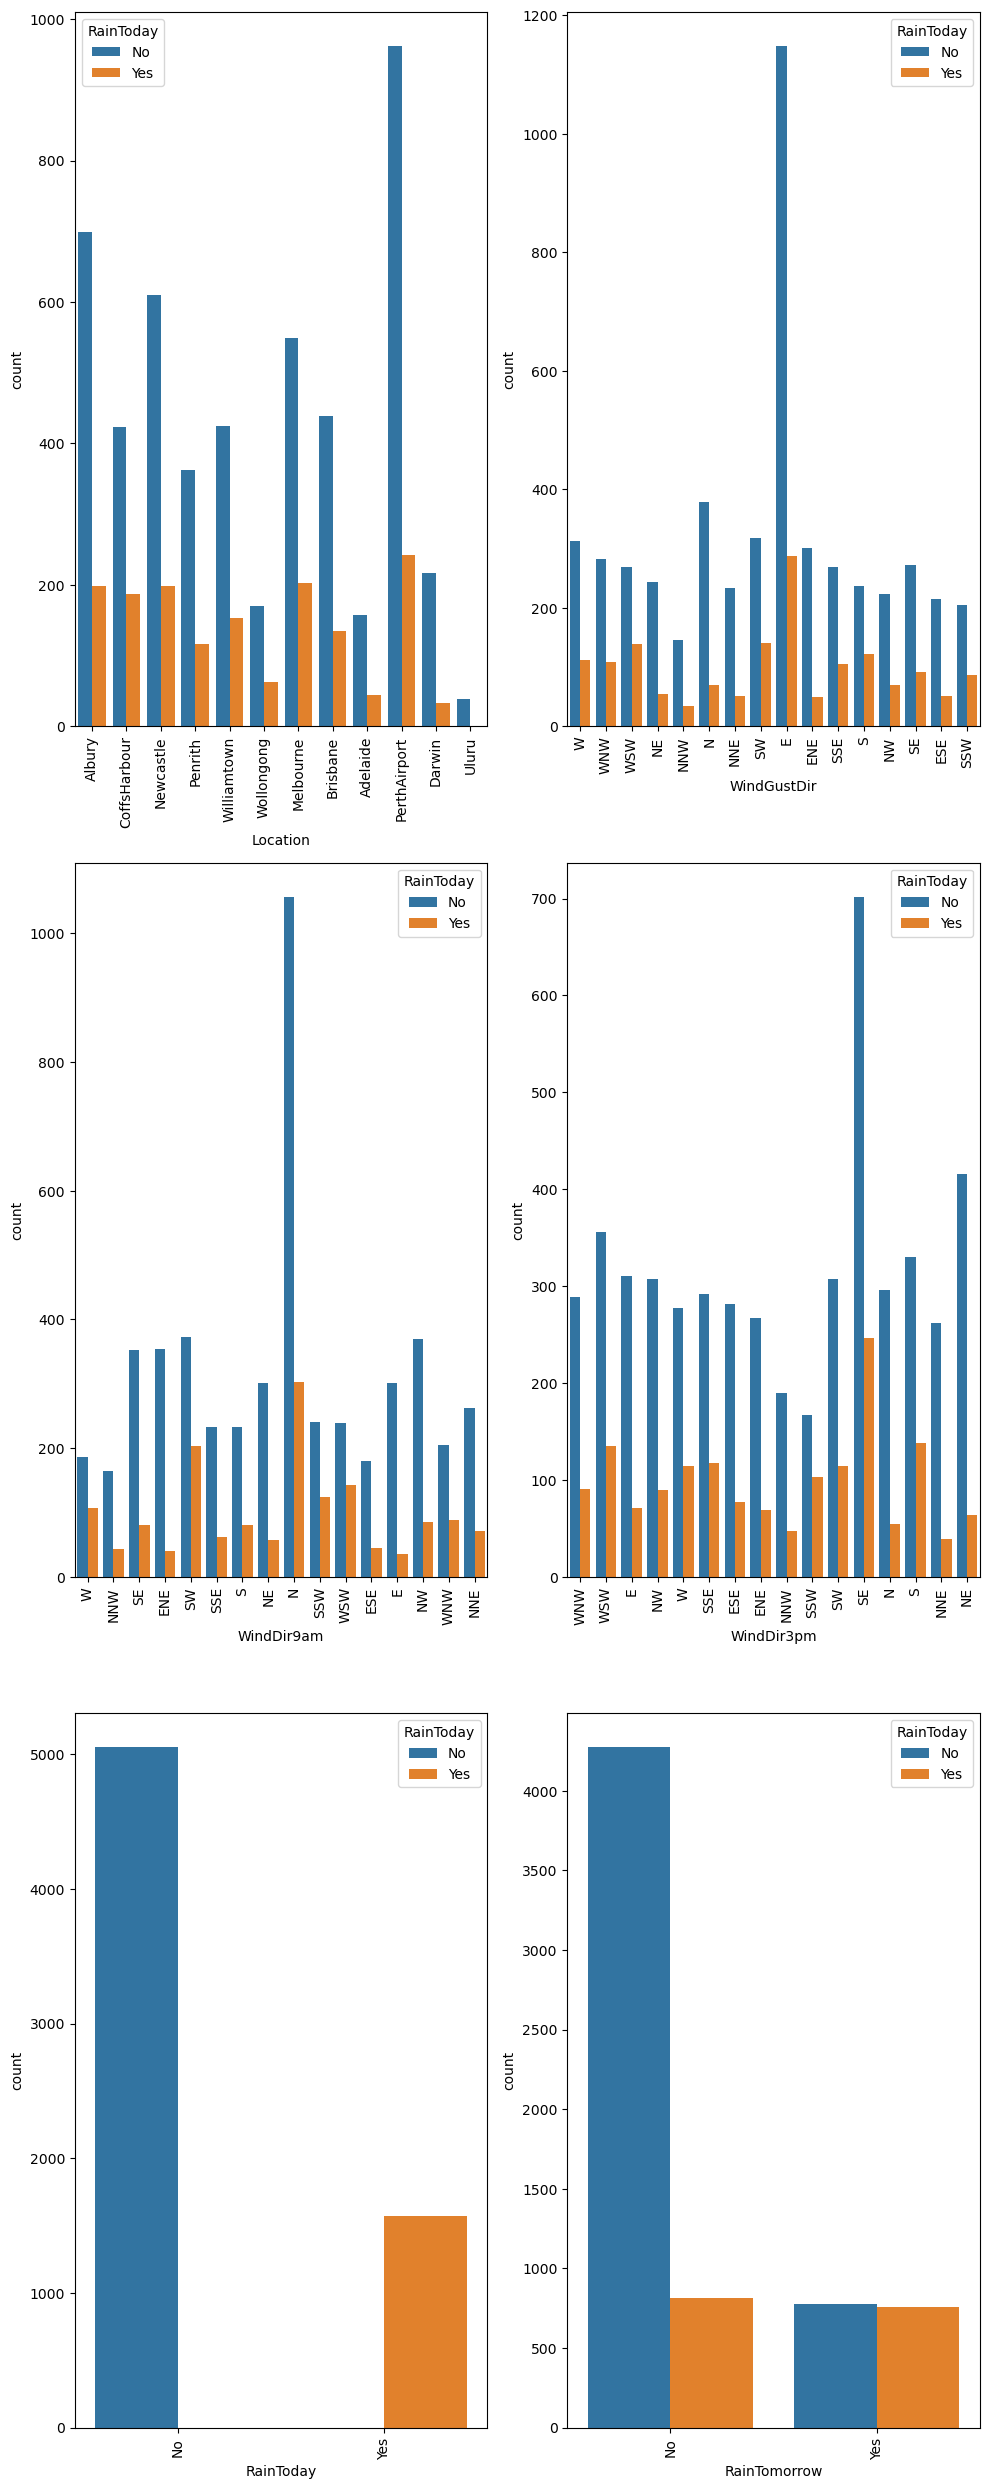

In [34]:
# Create the subplots 
fig = plt.figure(figsize=(10, 25)) # bivariate analysis categorical and income column

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df1, x=col,hue=df['RainToday'])
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1000x800 with 0 Axes>

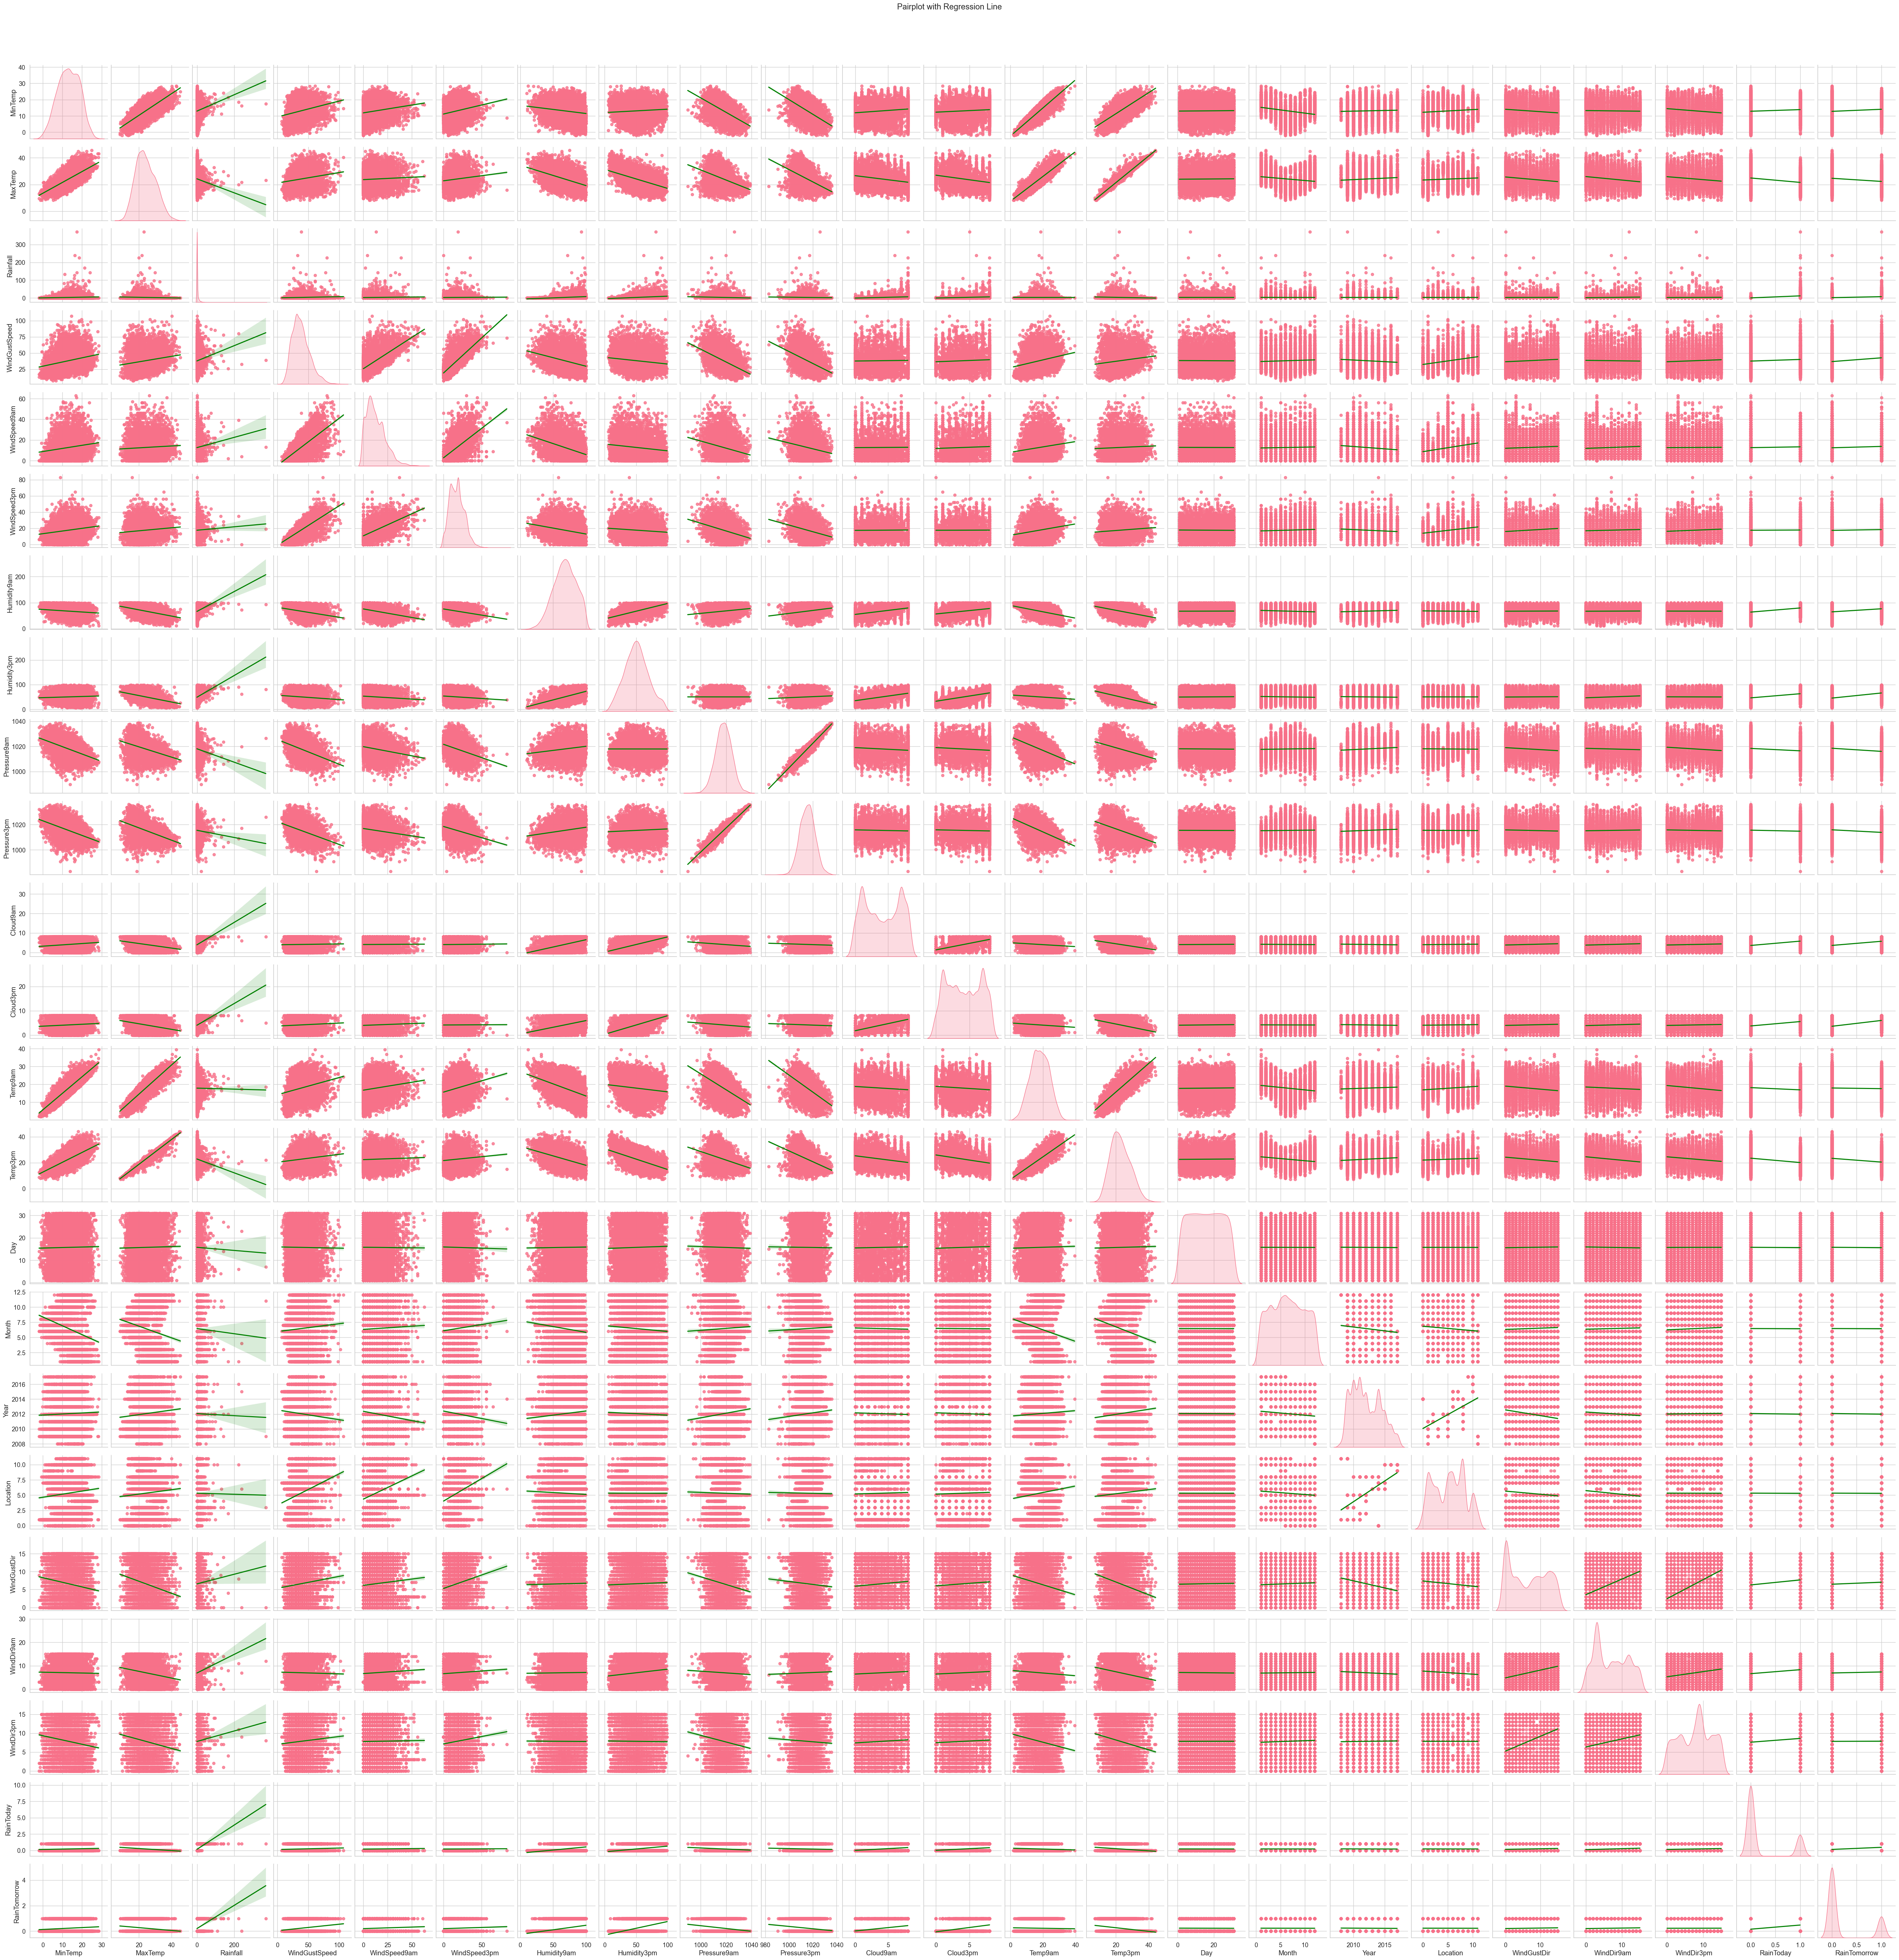

In [128]:
# Pairplot with regression line before handling outliers
# Customizing the Appearance
sns.set(style='whitegrid', font_scale=1.2)
sns.set_palette('husl')
plt.figure(figsize=(10, 8))

# Pairplot with regression line
sns.pairplot(df1, kind='reg', diag_kind='kde', markers='o', plot_kws={'line_kws': {'color': 'green'}})

# Adding a title
plt.suptitle('Pairplot with Regression Line', y=1.02)

# Show the plot
plt.show()

###  most of the features have positive relation with target

# Encoding the categorical values 

In [36]:
df1.columns.to_series().groupby(df1.dtypes).groups,categorical_columns

({float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']},
 ['Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'])

In [37]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    df1[i] = le.fit_transform(df1[i])
df1.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       3.6   
1         44.0         25.0       1010.6       1007.8       2.0       3.8   
2         38.0         30.0       1007.6       1008.7       2.6       2.0   
3         45.0         16.0       1017.6       1012.8       0.4       1.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  Day  Month    Year  Location  WindGustDir  WindDir9am  \
0     16.9     21.8  1.0   12.0  2008.0         1           13          13   
1     17.2     24.3  2.0   12.0  2008.0         1           14           6   
2     21.0     23.2  3.0   12.0  2008.0         1           15          13   
3     18.1     26.5  4.0   12.0  2008.0         1            4           9   
4     17.8     29.7  5.0   12.0  2008.0         1           13           1   

   WindDir3pm  RainToday  RainTomorrow  
0          14          0             0  
1          15          0             0  
2          15          0             0  
3           0          0             0  
4           7          0             0

## handling outliers

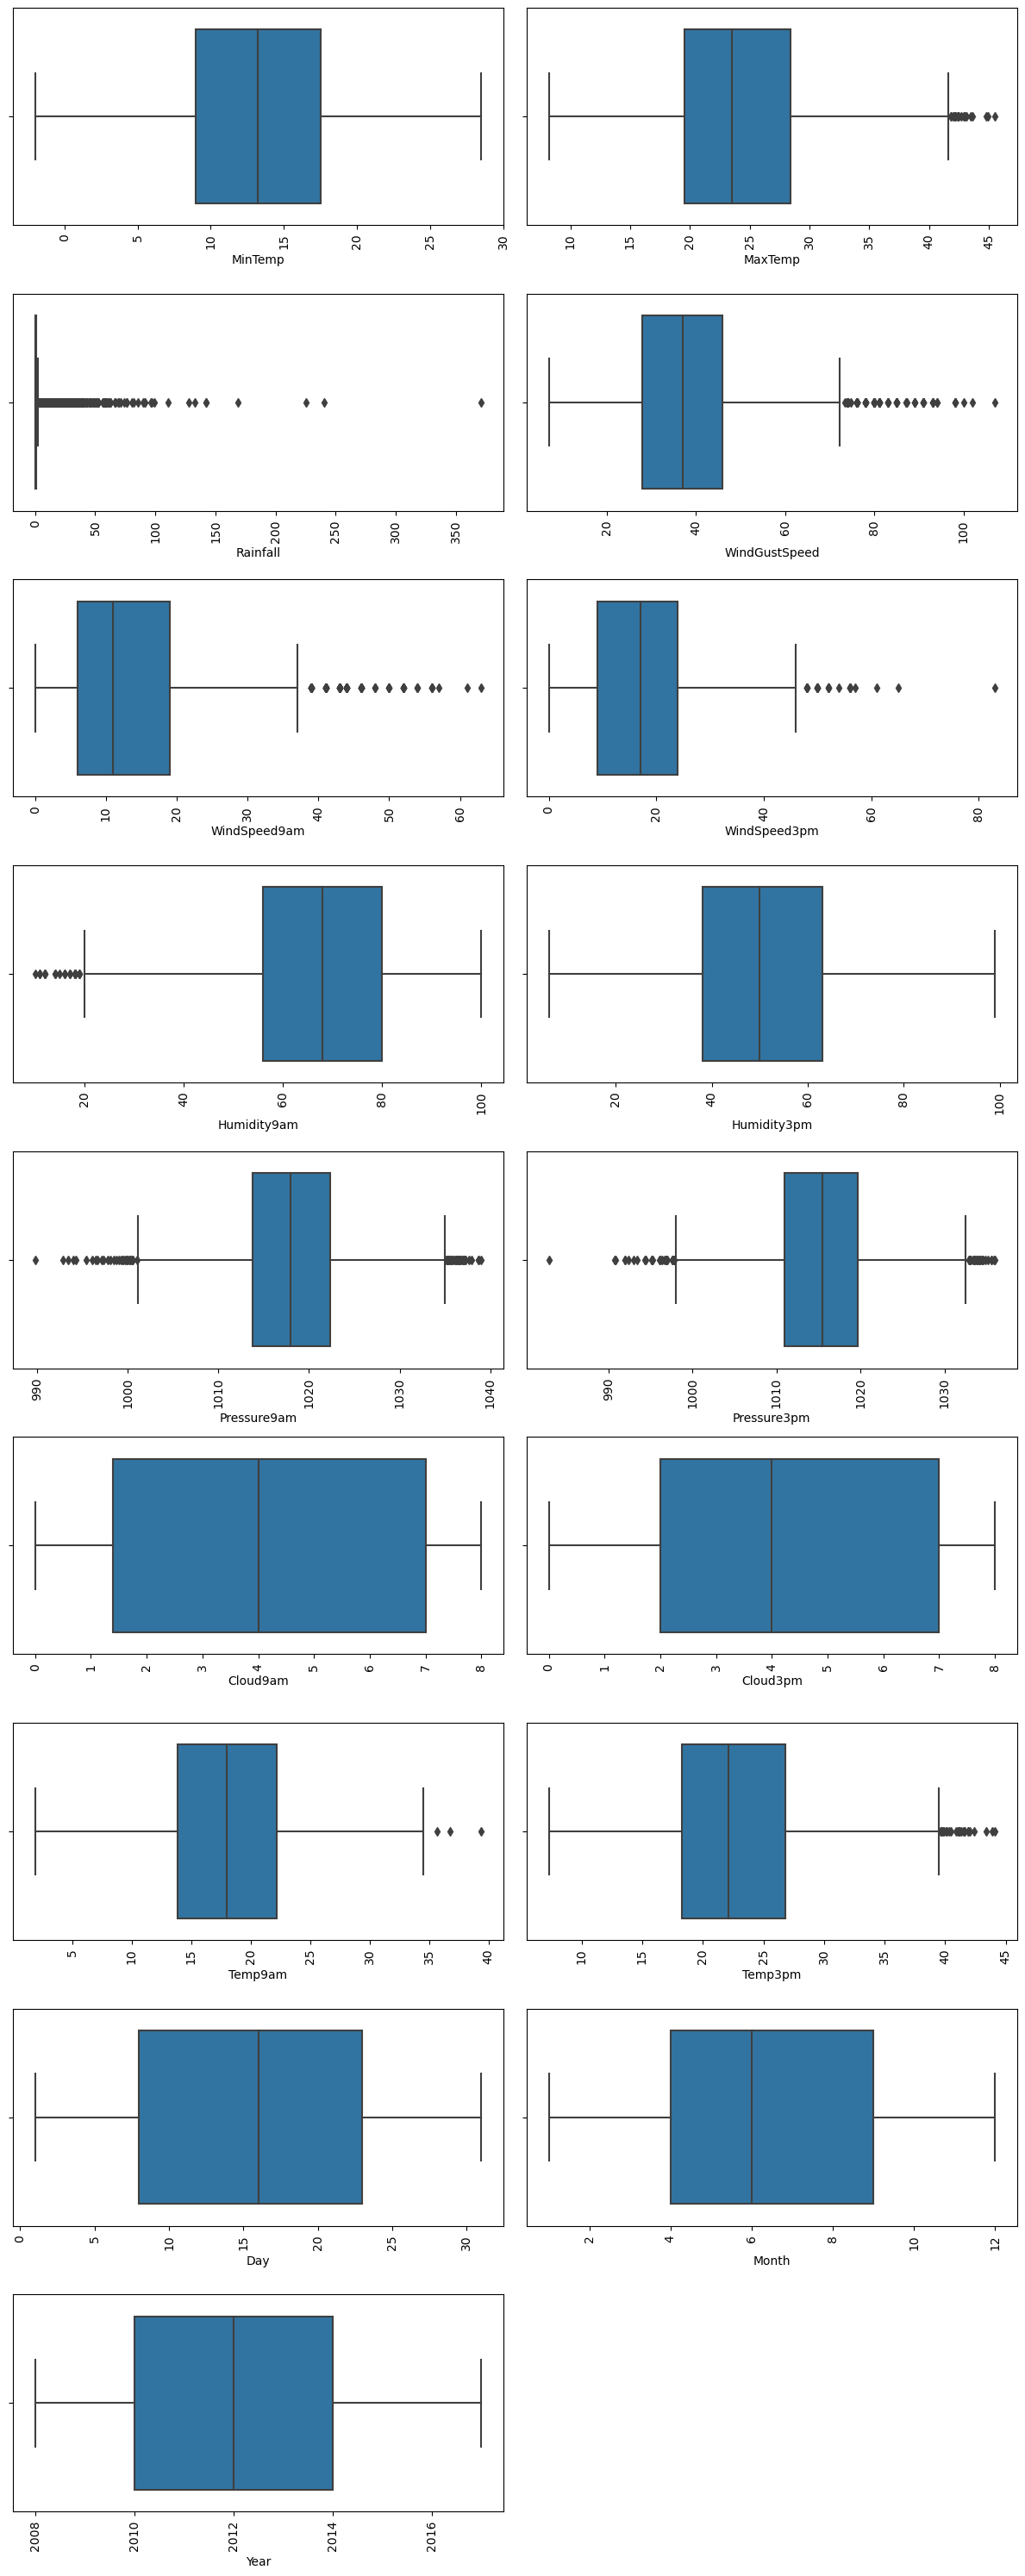

In [38]:
# Create the subplots
fig = plt.figure(figsize=(12, 30))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numeric_column):
    plt.subplot(9,2 , i + 1)
    sns.boxplot(data=df1, x=col,)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [39]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

data=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (6762, 23)
Shape of the dataframe after removing outliers:  (6492, 23)
Percentage of data loss post outlier removal:  3.9929015084294592


In [40]:
df2.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [41]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

#  skewness of the numeric features

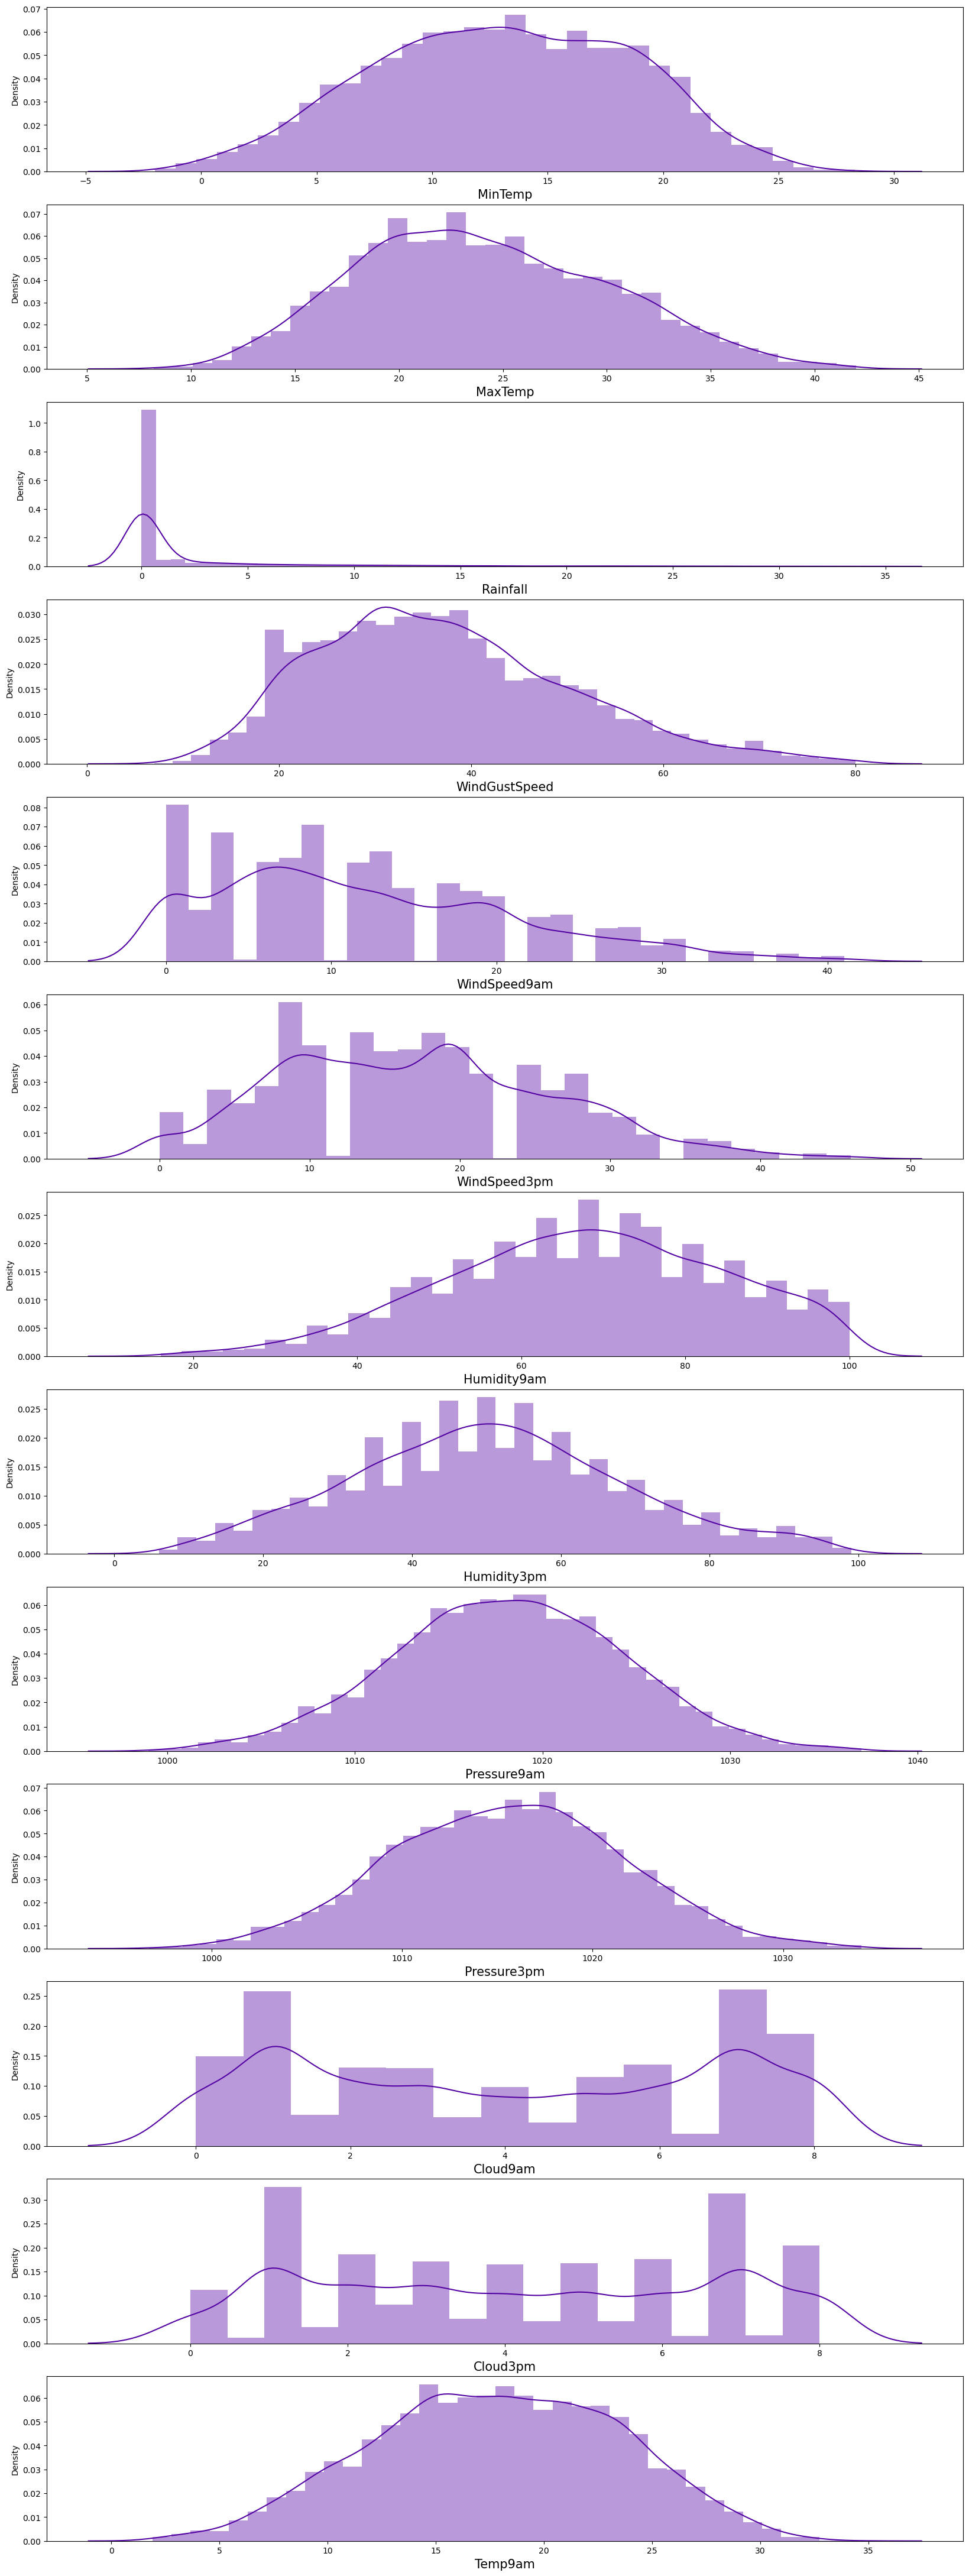

In [42]:
plt.figure(figsize=(20,60),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in numeric_column:
    if plotnum<14:
        plt.subplot(14,1,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [43]:
data[numeric_column].skew()

MinTemp         -0.081132
MaxTemp          0.260291
Rainfall         3.467126
WindGustSpeed    0.558148
WindSpeed9am     0.682828
WindSpeed3pm     0.346571
Humidity9am     -0.229628
Humidity3pm      0.160065
Pressure9am     -0.016173
Pressure3pm      0.030675
Cloud9am         0.020227
Cloud3pm         0.029727
Temp9am         -0.077904
Temp3pm          0.290097
Day              0.003097
Month            0.028542
Year             0.344660
dtype: float64

## now dataset seems to be normally distributed except one columns rainfall so we will apply transformation on that 

In [44]:
data['Rainfall'] = np.log1p(data['Rainfall'])

In [45]:
df2.skew()

MinTemp         -0.081132
MaxTemp          0.260291
Rainfall         3.467126
WindGustSpeed    0.558148
WindSpeed9am     0.682828
WindSpeed3pm     0.346571
Humidity9am     -0.229628
Humidity3pm      0.160065
Pressure9am     -0.016173
Pressure3pm      0.030675
Cloud9am         0.020227
Cloud3pm         0.029727
Temp9am         -0.077904
Temp3pm          0.290097
Day              0.003097
Month            0.028542
Year             0.344660
Location        -0.001404
WindGustDir      0.099798
WindDir9am       0.212275
WindDir3pm      -0.129021
RainToday        1.336258
RainTomorrow     1.329841
dtype: float64

* It seems to normal now

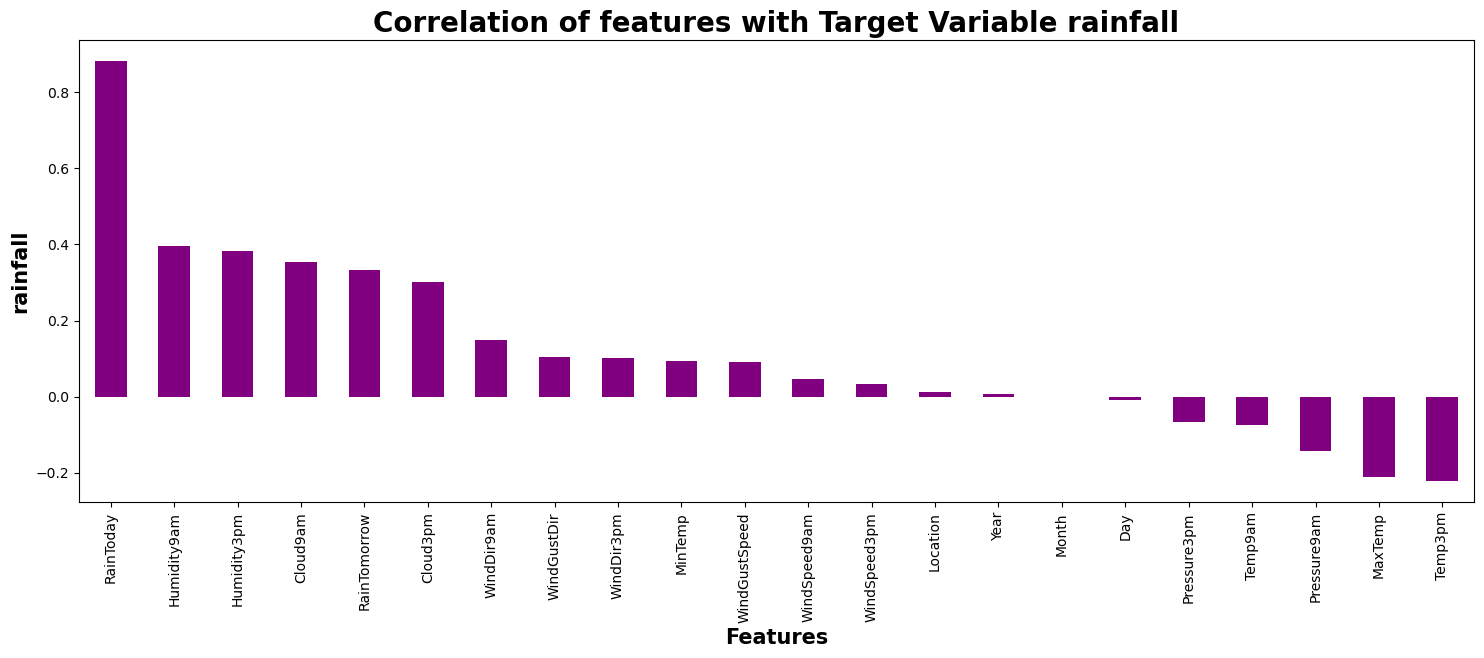

In [46]:
plt.figure(figsize = (18,6))
data.corr()['Rainfall'].drop(['Rainfall']).sort_values(ascending=False).plot(kind='bar', color='purple')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.ylabel('rainfall',fontsize= 15,fontweight='bold')
plt.title('Correlation of features with Target Variable rainfall',fontsize = 20,fontweight='bold')
plt.show()

* After looking into the corelation with targets some features have all most zero correlation with target .so will drop them.

In [47]:
data.drop(['Day','Month','Year'],axis=1,inplace=True)

In [48]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    data[i] = le.fit_transform(data[i])
data.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9  0.470004           44.0          20.0          24.0   
1      7.4     25.1  0.000000           44.0           4.0          22.0   
2     12.9     25.7  0.000000           46.0          19.0          26.0   
3      9.2     28.0  0.000000           24.0          11.0           9.0   
4     17.5     32.3  0.693147           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       3.6   
1         44.0         25.0       1010.6       1007.8       2.0       3.8   
2         38.0         30.0       1007.6       1008.7       2.6       2.0   
3         45.0         16.0       1017.6       1012.8       0.4       1.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  \
0     16.9     21.8         1           13          13          14          0   
1     17.2     24.3         1           14           6          15          0   
2     21.0     23.2         1           15          13          15          0   
3     18.1     26.5         1            4           9           0          0   
4     17.8     29.7         1           13           1           7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0

# balancing the targets using smote

In [49]:
data.RainToday.value_counts(),data.RainTomorrow.value_counts()

(0    5049
 1    1443
 Name: RainToday, dtype: int64,
 0    5043
 1    1449
 Name: RainTomorrow, dtype: int64)

In [63]:
# Splitting data in target and dependent feature
X = data.drop("RainToday", axis =1 )
y1 = data['RainToday']


In [64]:
X2 = data.drop(['RainTomorrow'], axis =1)
y2 = data['RainTomorrow']

In [65]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y1 = oversample.fit_resample(X, y1)
X2, Y2 = oversample.fit_resample(X2, y2)

In [66]:
Y1.value_counts(),Y2.value_counts()

(0    5049
 1    5049
 Name: RainToday, dtype: int64,
 0    5043
 1    5043
 Name: RainTomorrow, dtype: int64)

**We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.**

## Standard Scaling data for both the models 

In [67]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale2 = scaler.fit_transform(X2)

## Checking Multicollinearity between features using variance_inflation_factor

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0    10.214480        MinTemp
1    35.882797        MaxTemp
2     1.673912       Rainfall
3     3.538931  WindGustSpeed
4     2.328943   WindSpeed9am
5     2.607007   WindSpeed3pm
6     4.698915    Humidity9am
7     6.860517    Humidity3pm
8    23.846311    Pressure9am
9    22.774604    Pressure3pm
10    2.328171       Cloud9am
11    2.145033       Cloud3pm
12   20.140891        Temp9am
13   45.074646        Temp3pm
14    1.146782       Location
15    1.600638    WindGustDir
16    1.390587     WindDir9am
17    1.436557     WindDir3pm
18    1.481370   RainTomorrow

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale2,i) for i in range(len(X2.columns))]
vif["Features"] = X2.columns
vif

VIF values       Features
0     9.901178        MinTemp
1    31.940340        MaxTemp
2     3.540571       Rainfall
3     3.097645  WindGustSpeed
4     2.262356   WindSpeed9am
5     2.381468   WindSpeed3pm
6     4.668603    Humidity9am
7     7.045570    Humidity3pm
8    22.325026    Pressure9am
9    21.109168    Pressure3pm
10    2.326839       Cloud9am
11    2.182933       Cloud3pm
12   20.300123        Temp9am
13   41.846164        Temp3pm
14    1.140882       Location
15    1.521095    WindGustDir
16    1.347633     WindDir9am
17    1.404089     WindDir3pm
18    2.973234      RainToday

* some feature having very high Multicollinearity we will handle that by using PCA 

# Using PCA

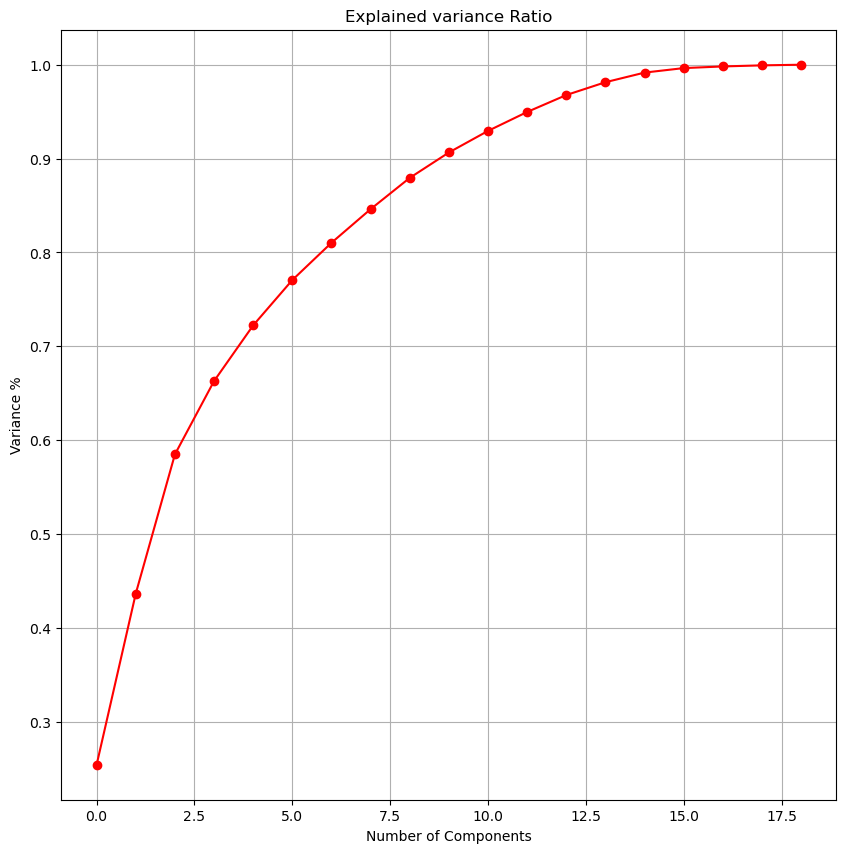

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [73]:
# creating n_components of the first model 
pca_new = PCA(n_components=14)
x_new = pca_new.fit_transform(X_scale)

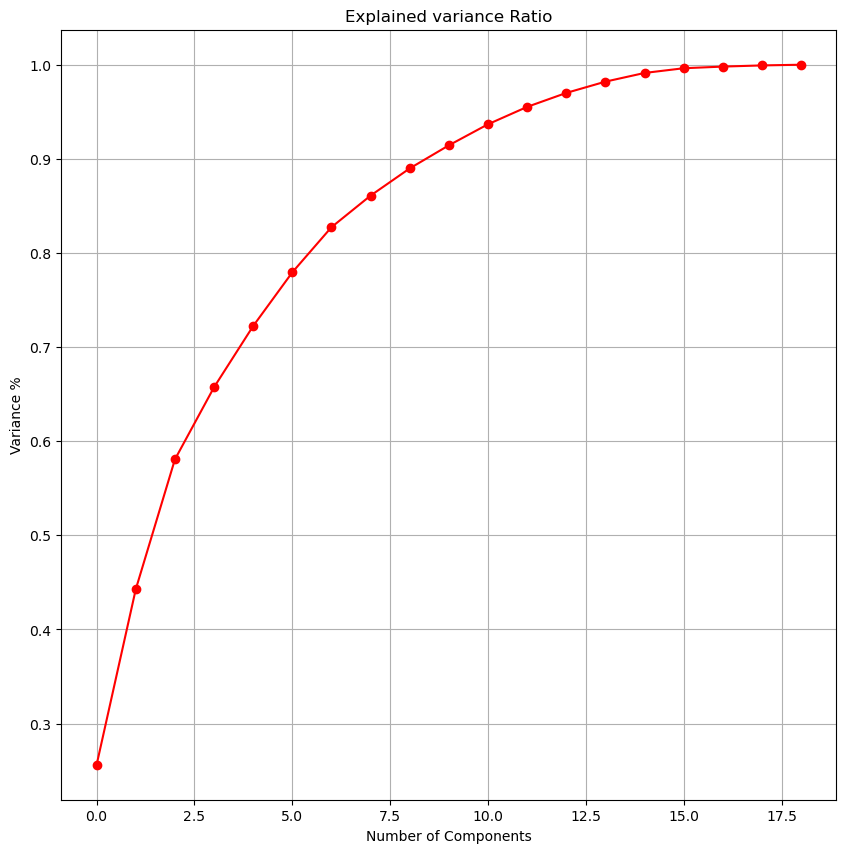

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale2)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [75]:
pca_new = PCA(n_components=14)
x_new2 = pca_new.fit_transform(X_scale2)

In [76]:
principle_x=pd.DataFrame(x_new,columns=np.arange(14))
principle_x2=pd.DataFrame(x_new2,columns=np.arange(14))

## Train Test split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, Y1, random_state=99, test_size=.3)


In [104]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(principle_x2, Y2, random_state=99, test_size=.3)

## Model building -1

## Logistic Regression

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1494
           1       0.99      1.00      0.99      1536

    accuracy                           0.99      3030
   macro avg       0.99      0.99      0.99      3030
weighted avg       0.99      0.99      0.99      3030

Cross-Validation Scores: [0.98415842 0.98217822 0.98267327 0.97919762 0.99851412]
Mean Cross-Validation Score: 0.9853443278948995


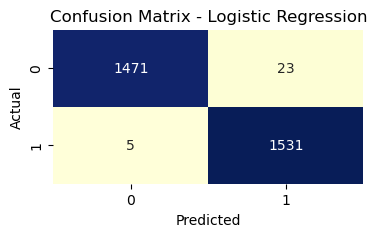

ROC AUC Score: 0.9942822505298974


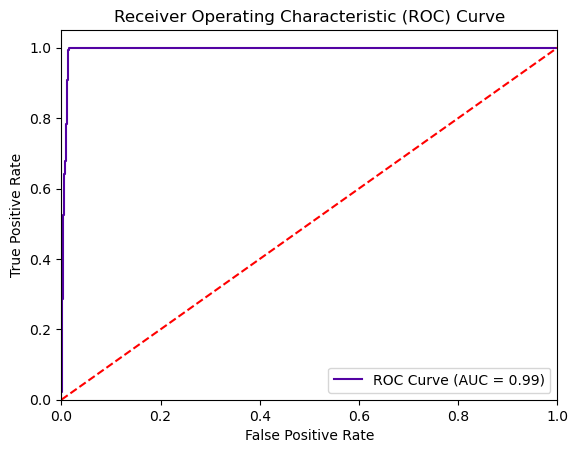

In [95]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, principle_x, Y1, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#  y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



## DecisionTree Classifier

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1494
           1       0.93      0.93      0.93      1536

    accuracy                           0.93      3030
   macro avg       0.93      0.93      0.93      3030
weighted avg       0.93      0.93      0.93      3030

Cross-Validation Scores: [0.88366337 0.90247525 0.88366337 0.93214463 0.95146112]
Mean Cross-Validation Score: 0.9106815451233088


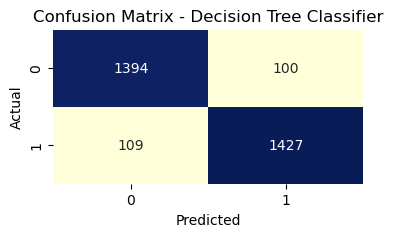

ROC AUC Score: 0.9248656954205713


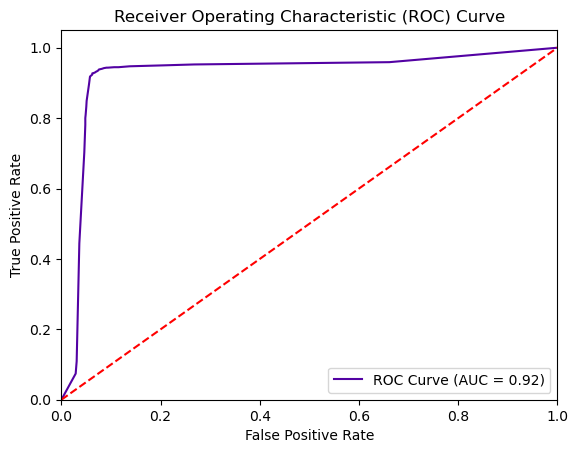

In [97]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, principle_x, Y1, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Random Forest Classifier

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1494
           1       0.98      0.96      0.97      1536

    accuracy                           0.97      3030
   macro avg       0.97      0.97      0.97      3030
weighted avg       0.97      0.97      0.97      3030

Cross-Validation Scores: [0.95594059 0.95940594 0.9539604  0.97275879 0.98811293]
Mean Cross-Validation Score: 0.9660357298731359


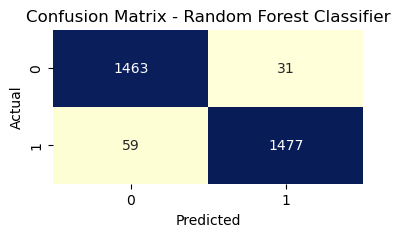

ROC AUC Score: 0.9938987721720215


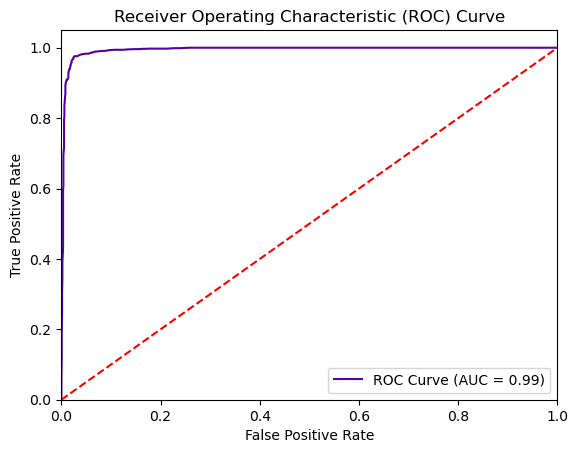

In [100]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, principle_x, Y1, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Creating dataset Of all Models

In [101]:
# Create a list of model names
model_names = [ 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression']

# Create a list of models and their corresponding accuracy scores
models = [ RF, dt, LG]
accuracy_scores = [ accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                 Model Name  Accuracy Score
1       Logistic Regression        0.990759
2  Random Forest Classifier        0.970297
3  Decision Tree Classifier        0.931023


## predicting test data based on training data using best model

In [110]:
test_pred = best_LG.predict(X_test)
test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Saving the model 

In [111]:
import pickle
with open('best_model','wb') as f:
    pickle.dump(best_LG,f)
pickle.dump(X_scale, open('scaler.pkl','wb'))

# Model Building -2

## Logistic Regression 

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1486
           1       0.81      0.75      0.78      1540

    accuracy                           0.78      3026
   macro avg       0.79      0.78      0.78      3026
weighted avg       0.79      0.78      0.78      3026

Cross-Validation Scores: [0.69326065 0.72583044 0.65939514 0.76251859 0.80713932]
Mean Cross-Validation Score: 0.7296288288890318


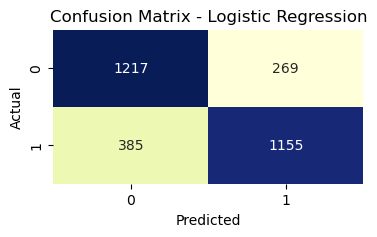

ROC AUC Score: 0.8717169775043261


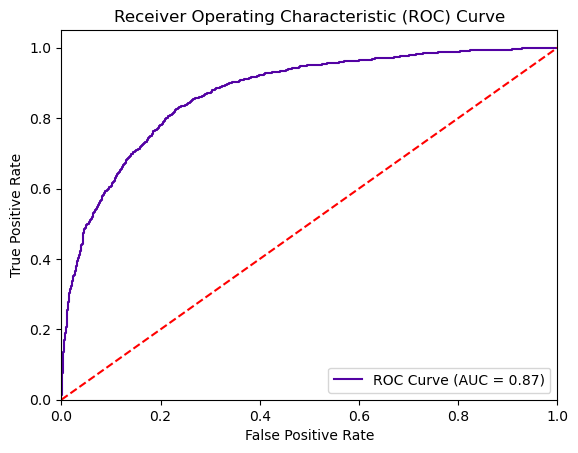

In [106]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train2, y_train2)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test2)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, principle_x2, Y2, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_LG.predict_proba(X_test2)[:, 1]
auc_score = roc_auc_score(y_test2, y_prob)
print("ROC AUC Score:", auc_score)

#  y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test2, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



## Decision Tree Classifier

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1486
           1       0.77      0.78      0.78      1540

    accuracy                           0.77      3026
   macro avg       0.77      0.77      0.77      3026
weighted avg       0.77      0.77      0.77      3026

Cross-Validation Scores: [0.6987116  0.64947942 0.71641051 0.76400595 0.78532474]
Mean Cross-Validation Score: 0.7227864440658761


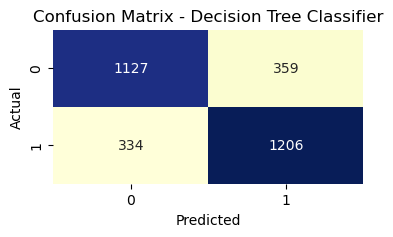

ROC AUC Score: 0.7707643634965304


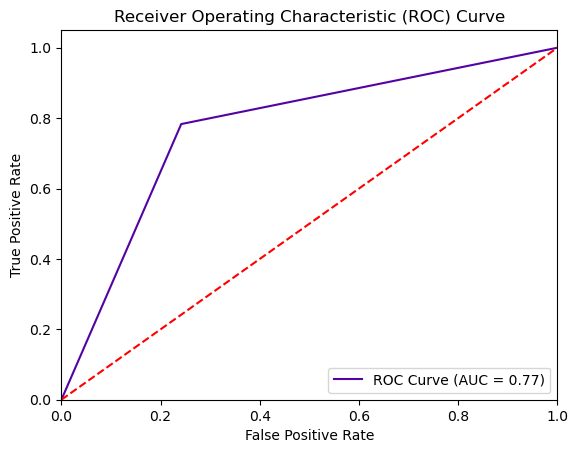

In [107]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train2, y_train2)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test2)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, principle_x2, Y2, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_dt.predict_proba(X_test2)[:, 1]
auc_score = roc_auc_score(y_test2, y_prob)
print("ROC AUC Score:", auc_score)


#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test2, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGB Classifier

[23:14:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:14:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:14:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

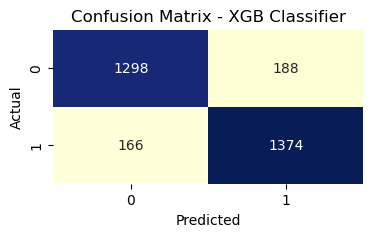

ROC AUC Score: 0.9470283249724702


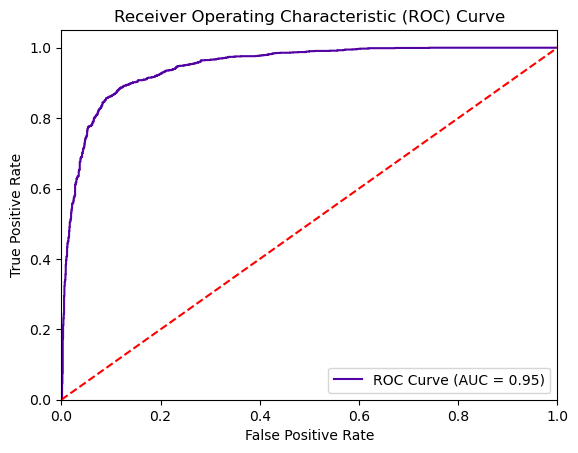

In [116]:
# Define the parameter grid
# n_jobs=-1 to allow run it on all cores
# Ignore the specific XGBoost warning
warnings.filterwarnings("ignore", message=".*min_samples_split.*")
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

# Create the Decision Tree Classifier
xgb = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_xg = XGBClassifier(**best_params)

# Fit the model on the training data
best_xg.fit(X_train2, y_train2)

# Make predictions on the test set
xg_y_pred = best_xg.predict(X_test2)

print("Xgb Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, xg_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_xg, principle_x2, Y2, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, xg_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGB Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_xg.predict_proba(X_test2)[:, 1]
auc_score = roc_auc_score(y_test2, y_prob)
print("ROC AUC Score:", auc_score)


#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test2, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1486
           1       0.88      0.87      0.87      1540

    accuracy                           0.87      3026
   macro avg       0.87      0.87      0.87      3026
weighted avg       0.87      0.87      0.87      3026

Cross-Validation Scores: [0.77106046 0.71294001 0.74863659 0.85027268 0.87456619]
Mean Cross-Validation Score: 0.7914951848829056


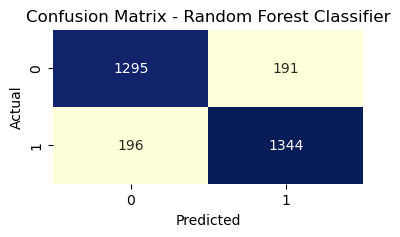

ROC AUC Score: 0.9432598189159427


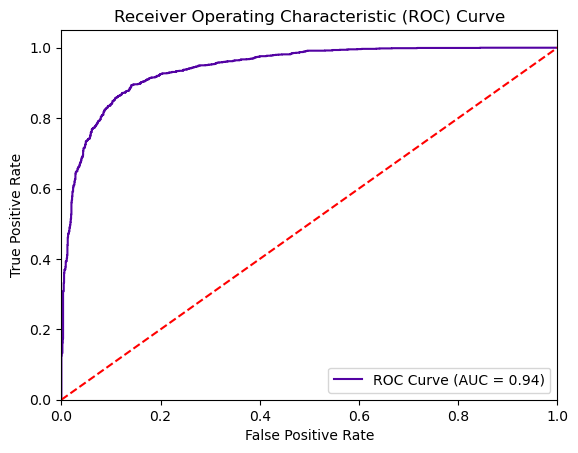

In [117]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()


# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train2, y_train2)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test2)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test2, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, principle_x2, Y2, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test2, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_RF.predict_proba(X_test2)[:, 1]
auc_score = roc_auc_score(y_test2, y_prob)
print("ROC AUC Score:", auc_score)

#ROC Curve
# Assuming y_test contains true labels and y_prob contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test2, y_prob, pos_label=1)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Creating dataset Of all Models

In [122]:
# Create a list of model names
model_names = [ 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression',"XGB Classifier"]

# Create a list of models and their corresponding accuracy scores
models = [ RF, dt, LG,xgb]
accuracy_scores = [ accuracy_score(y_test2, RF_y_pred), accuracy_score(y_test2, dt_y_pred), accuracy_score(y_test2, LG_y_pred),accuracy_score(y_test2,xg_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)

                 Model Name  Accuracy Score
1            XGB Classifier        0.883014
2  Random Forest Classifier        0.872108
3       Logistic Regression        0.783873
4  Decision Tree Classifier        0.770985


## predicting test data based on training data using best model

In [123]:
test_pred2= best_xg.predict(X_test2)
test_pred2

array([0, 0, 0, ..., 1, 0, 0])

## Saving the model 2

In [124]:
import pickle
with open('best_model2','wb') as f:
    pickle.dump(best_RF,f)
pickle.dump(X_scale2, open('scaler2.pkl','wb'))    